In [92]:
from fastai.datasets import Config
from fastai.tabular import *
from fastai.utils.collect_env import show_install
import zipfile
import os

show_install()



```text
=== Software === 
python       : 3.7.2
fastai       : 1.0.46
fastprogress : 0.1.20
torch        : 1.0.1.post2
torch cuda   : 10.0.130 / is **Not available** 

=== Hardware === 
No GPUs available 

=== Environment === 
platform     : Linux-4.4.0-17763-Microsoft-x86_64-with-debian-buster-sid
distro       : #253-Microsoft Mon Dec 31 17:49:00 PST 2018
conda env    : kaggle_sandbox
python       : /home/krzysiek/anaconda3/envs/kaggle_sandbox/bin/python
sys.path     : /mnt/e/Moje Pliki/Programy/kaggle_competitions
/home/krzysiek/anaconda3/envs/kaggle_sandbox/lib/python37.zip
/home/krzysiek/anaconda3/envs/kaggle_sandbox/lib/python3.7
/home/krzysiek/anaconda3/envs/kaggle_sandbox/lib/python3.7/lib-dynload

/home/krzysiek/anaconda3/envs/kaggle_sandbox/lib/python3.7/site-packages
/home/krzysiek/anaconda3/envs/kaggle_sandbox/lib/python3.7/site-packages/IPython/extensions
/home/krzysiek/.ipython
no supported gpus found on this system
```

Please make sure to include opening/closing ``` whe

# Competiton files setup

In [7]:
data_path = Config.data_path()/'santander'
competition_name = 'santander-customer-transaction-prediction'
data_path.mkdir(parents=True, exist_ok=True)
data_path

PosixPath('/home/krzysiek/.fastai/data/santander')

In [8]:
!kaggle competitions files -c {competition_name}

name                    size  creationDate         
---------------------  -----  -------------------  
train.csv              288MB  2019-02-12 01:02:37  
sample_submission.csv    3MB  2019-02-12 00:59:50  
test.csv               288MB  2019-02-12 01:02:37  


In [9]:
!kaggle competitions download -c {competition_name} -p {data_path}

100%|█████████████████████████████████████████| 122M/122M [02:58<00:00, 848kB/s]

100%|█████████████████████████████████████████| 463k/463k [00:00<00:00, 738kB/s]

100%|█████████████████████████████████████████| 122M/122M [03:09<00:00, 371kB/s]



In [18]:
data_path.ls()

[PosixPath('/home/krzysiek/.fastai/data/santander/sample_submission.csv.zip'),
 PosixPath('/home/krzysiek/.fastai/data/santander/test.csv.zip'),
 PosixPath('/home/krzysiek/.fastai/data/santander/train.csv.zip')]

In [21]:
# Need to unzip all files in the folder
def unzip_and_remove(file_name):
    print(f"Unziping {file_name}")
    
    with zipfile.ZipFile(data_path/file_name,"r") as zip_ref:
        zip_ref.extractall(data_path)
        
    print(f"Done. Deleting {file_name}")
    os.remove(data_path/file_name)
    print("Done")

unzip_and_remove('sample_submission.csv.zip')
unzip_and_remove('train.csv.zip')
unzip_and_remove('test.csv.zip')

Unziping sample_submission.csv.zip
Done. Deleting sample_submission.csv.zip
Done
Unziping train.csv.zip
Done. Deleting train.csv.zip
Done
Unziping test.csv.zip
Done. Deleting test.csv.zip
Done


In [22]:
data_path.ls()

[PosixPath('/home/krzysiek/.fastai/data/santander/sample_submission.csv'),
 PosixPath('/home/krzysiek/.fastai/data/santander/test.csv'),
 PosixPath('/home/krzysiek/.fastai/data/santander/train.csv')]

# Data exploration

In [80]:
train_df = pd.read_csv(data_path/'train.csv')
test_df = pd.read_csv(data_path/'test.csv')
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [24]:
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [25]:
print(f"Train length: {len(train_df)}")
print(f"Test length: {len(test_df)}")

Train length: 200000
Test length: 200000


In [26]:
# Only for demonstration purposes - not a valid test set
sample_submission_df = pd.read_csv(data_path/'sample_submission.csv')
sample_submission_df.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


# Final data preparation

In [81]:
# Limit nbr of samples for experimentation; this cell needs to be commented during actual training
train_df = train_df.iloc[:500].copy()
test_df = test_df.iloc[:500].copy()

In [82]:
procs = [FillMissing, Normalize] # preprocessing pipeline

In [83]:
dep_var = 'target' # Variable to predict

final_train_df = train_df.drop(columns=['ID_code'])
final_test_df = test_df.drop(columns=['ID_code'])

# Looks like all parameters are continuous so there is no need to split
# Need to explicitly set cont_vars because TabularList doesn't assume that 
# columns are continuous if they are no categorical or dependant (TabularDataBunch has this feature) 
cont_vars = list(final_test_df) 

In [84]:
# Will treat all parameters as continuous
test = TabularList.from_df(final_test_df, path=data_path)

data = (TabularList
        .from_df(final_train_df, path=data_path, cont_names=cont_vars, procs=procs)
        .random_split_by_pct()
        .label_from_df(cols=dep_var)
        .add_test(test)
        .databunch()
       )

In [85]:
data.show_batch()

var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
1.8753,1.0101,1.3130,-0.6075,-1.2730,1.4292,-1.1976,-1.9136,-1.1033,1.1759,0.1558,0.8911,0.2569,-2.5142,1.6786,0.8043,0.3213,-0.5505,-1.4495,-1.4412,-0.4920,-1.2952,0.8308,-0.7487,0.7237,0.4768,-1.6385,-0.9249,0.5835,-0.9594,-0.4673,-0.0564,-0.2103,0.9960,1.5164,-1.3137,1.4757,-0.2617,0.9807,0.8360,0.2144,1.5577,0.6520,0.6018,1.3999,1.3662,1.5331,-1.9237,1.9382,-1.6510,-0.3947,1.0097,1.3053,1.8021,0.6404,-1.6508,-1.4325,0.2404,1.5357,0.1647,0.2107,-0.5767,-0.5425,-0.3677,0.2488,0.5206,-1.5084,-1.1281,-0.4488,1.2830,-0.5448,1.6777,-0.8698,-0.8670,1.7111,0.2367,1.3431,-0.3093,1.0288,0.2529,-0.7242,0.0979,1.4143,-0.0807,0.2723,-1.5898,-1.0993,0.8113,-1.6050,-0.4896,0.4723,-1.5757,0.7085,0.0904,1.8944,0.8036,-1.1235,0.9094,-0.0479,0.2244,0.0322,-0.2160,-0.7798,1.7482,-0.6280,0.4312,1.3136,0.7913,0.8449,0.7199,0.7710,-0.5910,-0.1990,0.2984,-1.1565,0.3346,-1.2728,-1.3409,0.5412,-0.0056,-0.0744,1.5784,-0.0974,1.0991,1.1754,1.3105,-0.5057,-1.0635,-0.4049,0.6463,-2.2287,1.2200,0.9471,0.2472,-0.2506,-1.5573,0.4206,0.3631,1.3656,-0.4927,-0.9048,-0.7599,-0.6167,-0.4236,-0.9888,2.4044,-0.4610,-0.1862,0.3216,2.1084,-1.7306,-0.9179,0.5908,-0.4123,-0.3247,0.4864,1.6346,-1.6410,1.5422,-0.0459,0.6002,0.6872,-0.7910,-0.2938,-0.4387,-0.9237,-0.6687,-0.7052,-0.9491,0.6924,0.7133,-0.1871,-1.6632,0.7963,1.7660,0.4808,0.0609,-0.3120,0.9953,-1.6365,-0.2333,-1.7200,-1.3194,-1.5094,-1.5416,0.8544,0.8114,-0.6405,-0.5672,-0.0545,-0.3964,2.5967,-0.2202,-0.4385,-0.9893,-1.3500,-0.7320,-0.8222,1.1655,0.8059,0
1.1172,-0.6423,-1.4320,-1.0831,0.6740,-0.7213,-1.4102,-1.5882,1.5397,-1.2196,0.5734,0.7873,0.6054,1.3214,-1.1830,-0.3131,-0.9638,-0.4614,1.6827,-0.3934,-0.3367,-0.9170,-0.0926,-0.9021,0.1825,-0.9063,0.2625,0.5642,0.5270,-0.6179,0.3244,0.8202,1.7646,1.1812,-2.1094,1.0731,0.4188,0.7173,0.5200,0.2352,-1.3490,-1.3628,-1.8847,1.1542,-0.0170,-1.5001,0.1450,-0.7078,-0.9412,0.7984,-0.3778,1.1774,-0.2412,0.5022,-0.5755,0.8298,-0.4120,0.5880,-0.6674,-1.3284,1.2662,-0.2538,-2.0168,-1.1065,0.5173,0.0214,-0.9561,-1.0049,-0.6010,-0.6521,0.5211,-0.3612,-0.2412,-0.6035,0.0957,-1.6802,1.5839,-0.5272,1.6150,2.3812,0.4994,-0.8748,-0.6348,-0.4207,1.5322,0.0846,1.1908,0.0410,1.7073,0.7750,0.9125,-0.3461,0.6989,-0.3773,-1.6275,-0.4037,1.3495,1.6562,-2.1215,-0.2981,-0.6728,-1.0041,-1.7060,0.8970,0.0121,-0.7090,0.4673,0.5111,0.8966,-0.1769,-0.7005,-0.8279,-2.7625,0.4384,-0.1505,-0.7241,0.4505,1.9220,-1.1962,1.6000,0.2941,-0.6230,0.0023,0.3833,-0.6279,0.6644,-0.9883,0.9279,1.3231,-0.9537,0.3567,1.3794,-1.8004,

# Defining the model

In [88]:
learn = tabular_learner(data, layers=[300, 100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


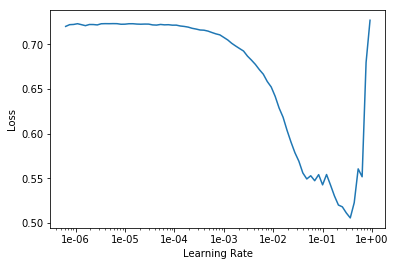

In [89]:
learn.lr_find()
learn.recorder.plot()

In [66]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
1,0.621573,0.648843,0.662921,00:02
2,0.554470,0.533766,0.713483,00:02
3,0.514429,0.438377,0.780899,00:02
4,0.497018,0.423366,0.831461,00:02
5,0.481955,0.392130,0.848315,00:02
6,0.469780,0.390165,0.859551,00:02
7,0.455952,0.386868,0.859551,00:02
8,0.443234,0.389295,0.853933,00:02
9,0.430413,0.403097,0.859551,00:02
10,0.421955,0.399108,0.859551,00:02


In [68]:
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


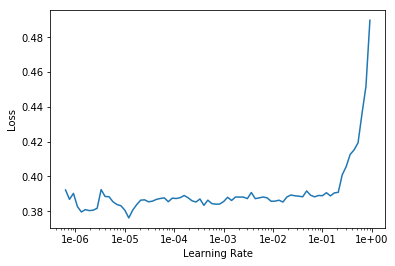

In [67]:
learn.lr_find()
learn.recorder.plot()

In [69]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
1,0.388837,0.400504,0.853933,00:02
2,0.390383,0.399338,0.853933,00:02
3,0.389139,0.396860,0.865169,00:02
4,0.384776,0.397412,0.865169,00:02
5,0.381091,0.395530,0.865169,00:02


In [70]:
learn.save('state-2')

# Final prediction and submission to Kaggle

In [99]:
preds, _ = learn.get_preds(DatasetType.Test)
labels = np.argmax(preds, 1)
assert(len(test_df) == len(labels))

In [106]:
submission_df = pd.DataFrame({'ID_code': test_df['ID_code'], 'target': labels})

In [107]:
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [109]:
submission_df.to_csv(data_path/'submission.csv', index=False)

In [112]:
# Only 3 submission allowed per day!
!kaggle competitions submit {competition_name} -f {data_path/'submission.csv'} -m "Using Fast ai (first submission, was 86% acc on training)"

100%|██████████████████████████████████████| 2.77k/2.77k [00:00<00:00, 15.5kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster